In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import vector
from tqdm.notebook import tqdm
from scipy import stats
import uproot

In [2]:
file_sm = uproot.open("SM.root")
file = uproot.open("DM.root")

In [3]:
df_DM = file['LHE'].arrays(file['LHE'].keys(), library="pd")
df_SM = file_sm['LHE'].arrays(file_sm['LHE'].keys(), library="pd")

In [4]:
df_SM['M_phi'] = np.sqrt(df_SM['E_phi']**2 - (df_SM['p_phi_x']**2 + df_SM['p_phi_y']**2 + df_SM['p_phi_z']**2))
df_DM['M_phi'] = np.sqrt(df_DM['E_phi']**2 - (df_DM['p_phi_x']**2 + df_DM['p_phi_y']**2 + df_DM['p_phi_z']**2))

In [5]:
df_SM['p_phi_z_abs'] = abs(df_SM['p_phi_z'])
df_DM['p_phi_z_abs'] = abs(df_DM['p_phi_z'])

In [6]:
df_SM['p_phi_z_sign'] = np.sign(df_SM['p_phi_z'])
df_DM['p_phi_z_sign'] = np.sign(df_DM['p_phi_z'])

In [7]:
df_DM['p_phi_z_sign'] = ((df_DM['p_phi_z_sign']+1)/2).astype(int)

In [8]:
df_DM


,p_nu_x,p_nu_y,p_nu_z,p_phi_x,p_phi_y,p_phi_z,E_phi,pt_phi,eta_phi,phi_phi,...,S_hat,Dphi_LepQ,Dphi_LepNu,Dphi_Wb,DR_LepQ,DR_LepNu,DR_Wb,Cos_lep_light,p_phi_z_abs,p_phi_z_sign
0,8.563190,-22.107172,5.036625,-293.582367,-87.813835,233.714325,555.449585,306.434130,0.703268,-2.850951,...,659.258949,0.131781,3.027128,3.128622,0.701550,3.027128,3.169862,0.940087,233.714325,1
1,-167.259460,213.415344,-408.175201,254.771896,-225.695297,147.351807,545.490295,340.363168,0.420429,-0.724955,...,567.941847,2.899541,2.717091,1.127737,3.984776,2.717091,3.180521,0.792971,147.351807,1
2,-95.677383,13.906806,-173.889221,143.558548,13.315942,47.313301,427.814117,144.174793,0.322544,0.092492,...,376.619585,0.309648,0.471203,2.867977,1.456223,2.127980,2.867997,0.965481,47.313301,1
3,1.064742,-12.076354,29.431393,335.906891,81.943901,-399.835815,662.885315,345.757491,-0.987763,0.239275,...,1560.313525,2.091265,2.867960,2.992942,4.478158,2.867960,3.076779,0.560995,399.835815,0
4,3.633137,-1.116495,-34.612125,13.185328,-127.544441,496.822723,650.595276,128.224168,2.063852,-1.467784,...,826.432085,1.839160,2.068013,3.067474,5.281282,2.068013,3.067650,-0.534875,496.822723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967782,7.937255,-35.376381,-29.394480,-191.618530,-24.454773,-854.067139,962.676636,193.172713,-2.192123,-3.014657,...,709.992089,2.027884,2.838436,3.105201,3.472216,2.838436,3.409173,0.592497,854.067139,0
967783,-14.655257,38.451820,10.320466,-170.816315,107.601585,-219.720596,499.032532,201.881932,-0.942496,2.579459,...,707.850575,2.418627,2.139073,3.115458,3.575651,2.139073,3.153269,0.313725,219.720596,0
967784,4.619597,-78.165710,-392.508698,18.883112,26.058931,-255.811218,475.893921,32.181358,-2.770133,0.943730,...,358.551736,2.756197,1.087227,2.733051,3.457057,1.549436,2.933908,0.720946,255.811218,0
967785,-50.287502,-85.008842,-1.378565,-28.190086,116.690300,223.734726,473.781097,120.047104,1.380976,1.807835,...,1032.604976,2.343220,1.560917,0.390524,3.233274,1.560917,0.853826,0.637583,223.734726,1


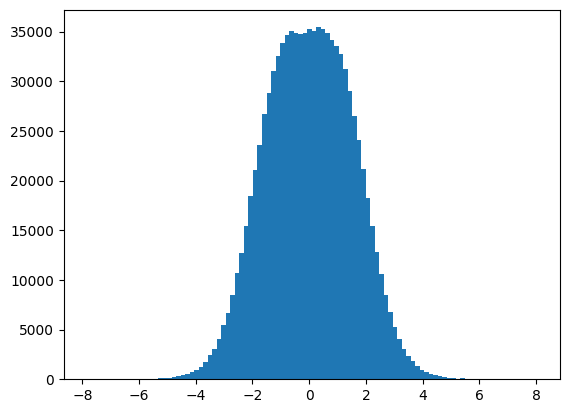

In [9]:
plt.hist(df_DM['eta_phi'], bins = 100)
plt.show()

In [147]:
df_DM['eta_phi_sign'] = np.sign(df_DM['eta_phi'])
df_DM['eta_phi_sign'] = ((df_DM['eta_phi_sign']+1)/2).astype(int)

In [148]:
df_DM['eta_phi_sign']

0         1
1         1
2         1
3         0
4         1
         ..
967782    0
967783    0
967784    0
967785    1
967786    0
Name: eta_phi_sign, Length: 967787, dtype: int32

In [154]:
train_raw_SM, test_raw_SM = train_test_split(df_SM, test_size=0.2)
train_raw_DM, test_raw_DM = train_test_split(df_DM, test_size=0.2)

train_raw = pd.concat([train_raw_SM, train_raw_DM], axis=0)
test_raw = pd.concat([test_raw_SM, test_raw_DM], axis=0)

In [155]:
train_raw = train_raw_DM
test_raw = test_raw_DM

In [156]:
#y_vars = ['p_nu_x', 'p_nu_y', 'p_nu_z', 'p_phi_z', 'M_phi']
y_vars = ['eta_phi_sign']
# y_vars = ['p_nu_x', 'p_nu_y', 'p_nu_z']
X_vars = ['p_l_x', 'p_l_y', 'p_l_z', 'p_b_x', 'p_b_y', 'p_b_z', 'p_q_x', 'p_q_y',
          'p_q_z', 'MET_x', 'MET_y', 'MET_z', 'Pt_Lep', 'Eta_Lep', 'Pt_J1', 'Eta_J1',
          'Pt_J2', 'Eta_J2', 'Pt_W', 'Eta_W', 'Pt_top', 'Eta_top', 'mW_inv', 'mtop_inv',
          'MtW', 'MtT', 'SP_LepB', 'SP_LepQ', 'SP_QB', 'SP_LepNu', 'SP_BNu', 'SP_QNu',
          'Ht', 'S_hat', 'Dphi_LepQ', 'Dphi_LepNu', 'Dphi_Wb', 'DR_LepQ', 'DR_LepNu', 'DR_Wb']


In [157]:
X_train_df = train_raw[X_vars]
X_test_df = test_raw[X_vars]
y_train_df = train_raw[y_vars]
y_test_df = test_raw[y_vars]

scaler_X = StandardScaler()
scaler_X.fit(np.array(train_raw[X_vars]))
X_train_df = pd.DataFrame(scaler_X.transform(np.array(train_raw[X_vars])), columns=X_vars)
X_test_df = pd.DataFrame(scaler_X.transform(np.array(test_raw[X_vars])), columns=X_vars)

In [158]:
X_train_cut = X_train_df.sample(n = 500_000, replace=False)
X_test_cut = X_test_df.sample(n = 100_000, replace=False)
y_train_cut = y_train_df.iloc[X_train_cut.index]
y_test_cut = y_test_df.iloc[X_test_cut.index]

In [159]:
X_train_cut.columns

Index(['p_l_x', 'p_l_y', 'p_l_z', 'p_b_x', 'p_b_y', 'p_b_z', 'p_q_x', 'p_q_y',
       'p_q_z', 'MET_x', 'MET_y', 'MET_z', 'Pt_Lep', 'Eta_Lep', 'Pt_J1',
       'Eta_J1', 'Pt_J2', 'Eta_J2', 'Pt_W', 'Eta_W', 'Pt_top', 'Eta_top',
       'mW_inv', 'mtop_inv', 'MtW', 'MtT', 'SP_LepB', 'SP_LepQ', 'SP_QB',
       'SP_LepNu', 'SP_BNu', 'SP_QNu', 'Ht', 'S_hat', 'Dphi_LepQ',
       'Dphi_LepNu', 'Dphi_Wb', 'DR_LepQ', 'DR_LepNu', 'DR_Wb'],
      dtype='object')

In [160]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [161]:
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train_cut.values).to(device)
dataset['test_input'] = torch.from_numpy(X_test_cut.values).to(device)
dataset['train_label'] = torch.from_numpy(y_train_cut.values).to(device)
dataset['test_label'] = torch.from_numpy(y_test_cut.values).to(device)

In [162]:
from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
    def __init__(
        self,
        input_values,
        labels,
        transforms=None,
    ):
        self.input_values = torch.from_numpy(input_values).type(torch.FloatTensor)
        self.labels = torch.from_numpy(labels).type(torch.FloatTensor)
        self.transforms = transforms

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if self.transforms:
            input_value = self.transforms(self.input_values[idx])
        else:
            input_value = self.input_values[idx]
        label = self.labels[idx]
        return input_value, label

In [163]:
train_set = CustomDataset(X_train_cut.values, y_train_cut.values)
test_set = CustomDataset(X_test_cut.values, y_test_cut.values)

In [164]:
len(train_set)

500000

In [165]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=2048, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=1024, shuffle=False
)

In [166]:
import lightning as L
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics.regression import MeanSquaredError, MeanAbsoluteError
from torchmetrics import MetricCollection

In [167]:
class NikitaModelMultiOutput(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_size, n_hidden_layers, dropout, activation_layer=torch.nn.Mish()):
        super(NikitaModelMultiOutput, self).__init__()
        self.input_dim = input_size
        self.hidden_dim = hidden_size
        self.activation = activation_layer
        self.sigmoid = torch.nn.Sigmoid()
        self.output_dim = output_size
        current_dim = input_size
        self.layers = nn.ModuleList()
        for i in range(n_hidden_layers):
            self.layers.append(nn.Linear(current_dim, hidden_size))
            self.layers.append(nn.Dropout(p=dropout))
            self.layers.append(activation_layer)
            current_dim = hidden_size
        self.layers.append(nn.Linear(current_dim, self.output_dim))
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [200]:
class LModel(L.LightningModule):

    def __init__(
            self, model, lr=1e-2,
        ):
        super().__init__()
        self.model = model
        self.criterion = nn.BCELoss()
        self.train_acc = MeanAbsoluteError()
        self.valid_acc = MeanAbsoluteError()
        self.test_acc = MeanAbsoluteError()
        self.lr = lr

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr = self.lr)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, min_lr = 1e-6)
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",  # or 'step'
                "monitor": "loss/val",  # only for self.log
            },
        }
        #return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.train_acc.update((out.detach()), y.detach())
        self.log("loss/train", loss.detach().item(), prog_bar=True)
        return loss

    def on_train_epoch_end(self):
        self.log("MAE/train", self.train_acc.compute(), prog_bar=True)
        self.train_acc.reset()

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.valid_acc.update((out.detach()), y.detach())
        self.log("loss/val", loss.detach().item())

    def on_validation_epoch_end(self):
        self.log("MAE/val", self.valid_acc.compute(), prog_bar=True)
        self.valid_acc.reset()

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        self.test_acc.update((out.detach()), y.detach())

    def on_test_epoch_end(self):
        self.log("MAE/test", self.test_acc.compute(), prog_bar=True)
        self.test_acc.reset()

In [201]:
from lightning.pytorch.callbacks import ModelCheckpoint
grid_size = 5

checkpoint_callback = ModelCheckpoint(
    dirpath='best_ckp/grid_' + str(grid_size) + '/',
    save_last=True,
    every_n_epochs=1,
    save_top_k=1,
    #save_weights_only=True,
    monitor="MAE/val",
    filename="model",
    mode="min",
)
torch.set_float32_matmul_precision('medium')
# L.seed_everything(42)
#model = KAN(layers_hidden=[len(X_vars), hidden_size, hidden_size, len(y_vars)], grid_size=grid_size)

model = NikitaModelMultiOutput(input_size=len(X_vars),
                            output_size=len(y_vars),
                            hidden_size=500,
                            n_hidden_layers=3,
                            dropout=0.1)
pl_model = LModel(model)
trainer = L.Trainer(
    max_epochs=20,
    callbacks=[checkpoint_callback],
    num_sanity_val_steps=1,
    log_every_n_steps=10,
    logger=L.pytorch.loggers.TensorBoardLogger(save_dir="./MLP_test/", ),
)

trainer.fit(
    model=pl_model,
    train_dataloaders=train_loader,
    val_dataloaders=test_loader
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
E:\NN\NN_SINP\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:653: Checkpoint directory E:\NN\best_ckp\grid_5 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                   | Params
-----------------------------------------------------
0 | model     | NikitaModelMultiOutput | 522 K 
1 | criterion | BCELoss                | 0     
2 | train_acc | MeanAbsoluteError      | 0     
3 | valid_acc | MeanAbsoluteError      | 0     
4 | test_acc  | MeanAbsoluteError      | 0     
-----------------------------------------------------
522 K     Trainable params
0         Non-trainable params
522 K     Total params
2.088     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

E:\NN\NN_SINP\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
E:\NN\NN_SINP\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

E:\NN\NN_SINP\lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [28]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

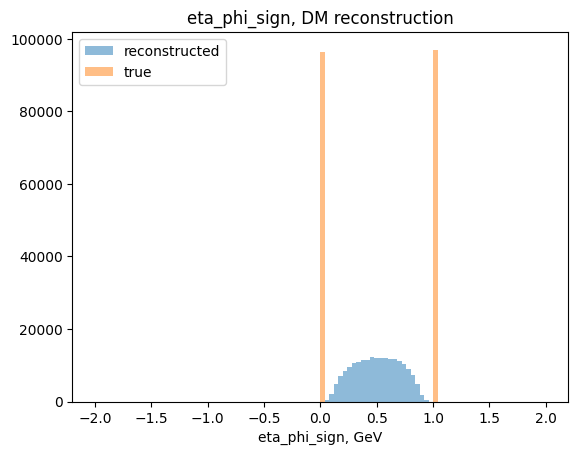

In [199]:
#model = torch.load('best_model_mixed.pt')
import os
X_test_DM = pd.DataFrame(scaler_X.transform(np.array(test_raw_DM[X_vars])), columns=X_vars)
# y_test_DM = pd.DataFrame(scaler_y.transform(np.array(test_raw_DM[y_vars])), columns=y_vars)
y_test_DM = np.array(test_raw_DM[y_vars])
with torch.no_grad():
    pred = model.forward(torch.from_numpy(X_test_DM.values).type(torch.FloatTensor).to(device)).cpu()

# pred_unscaled = scaler_y.inverse_transform(pred)
# y_test_unscaled = scaler_y.inverse_transform(y_test_DM)
bins = 100
alpha = 0.5
bin_ranges = [(-2, 2), (-500, 500), (-1000, 1000), (-2000, 2000), (-500, 500)]


mkdir_p(f"plots/grid_{grid_size}")    
for i in range(len(y_vars)):
    bin_range = bin_ranges[i]
    plt.hist(pred[:, i], bins=bins, alpha=alpha, range=bin_range, label='reconstructed')
    plt.hist(y_test_DM[:, i], bins=bins, alpha=alpha, range=bin_range, label='true')
    plt.title(y_vars[i] + ', DM reconstruction')
    plt.xlabel(y_vars[i] + ', GeV')
    plt.legend()
    plt.savefig(f"plots/{y_vars[i]}_DM.pdf")
    plt.show()
    

In [170]:
import shap
masker = shap.maskers.Independent(X_train_cut.values)

In [171]:
masker

In [172]:
model.to(device)

NikitaModelMultiOutput(
  (activation): Mish()
  (sigmoid): Sigmoid()
  (layers): ModuleList(
    (0): Linear(in_features=40, out_features=500, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Mish()
    (3): Linear(in_features=500, out_features=500, bias=True)
    (4): Dropout(p=0.1, inplace=False)
    (5): Mish()
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Mish()
    (9): Linear(in_features=500, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [173]:
def numpy_predict(data):
    with torch.no_grad():
        return model.forward(torch.from_numpy(data).type(torch.FloatTensor).to(device)).detach().cpu().numpy()

In [174]:
X_test_SM = pd.DataFrame(scaler_X.transform(np.array(test_raw_SM[X_vars])), columns=X_vars)

In [175]:
explainer = shap.KernelExplainer(numpy_predict, X_test_SM[:20])
explanations = explainer(X_test_DM.values[20:40])

  0%|          | 0/20 [00:00<?, ?it/s]

In [176]:
explanations = explanations[:,:,0]

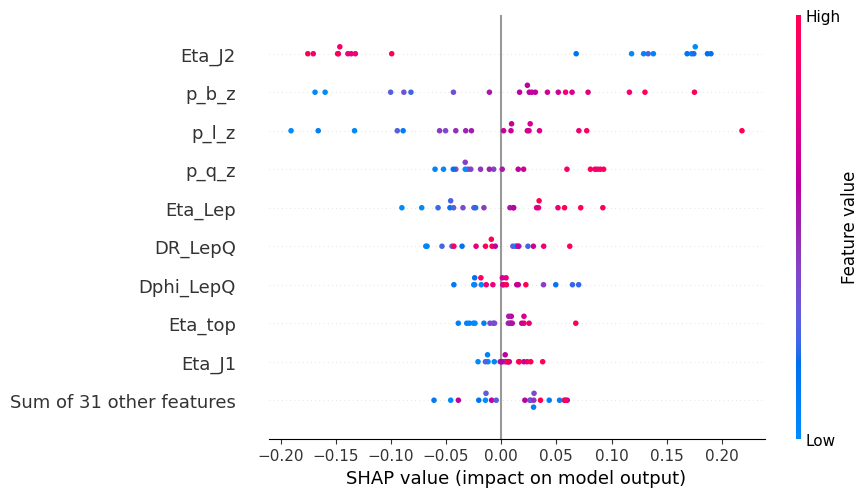

In [177]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction’s explanation
shap.plots.beeswarm(explanations)

In [ ]:
# checkpoint = torch.load('./best_ckp/model-v1.ckpt')
# state_dict = checkpoint["state_dict"]
# model_dict = {key.removeprefix("model."):val for key, val in state_dict.items()}
# model.load_state_dict(model_dict)

In [181]:
import lightgbm
cls = lightgbm.LGBMClassifier()

In [210]:
X_train_shap = X_train_cut[["Eta_J2", "p_b_z", "p_l_z","Eta_Lep","DR_LepQ","Dphi_LepQ","Eta_top","Eta_J1"]]
X_test_shap = X_test_cut[["Eta_J2", "p_b_z", "p_l_z","Eta_Lep","DR_LepQ","Dphi_LepQ","Eta_top","Eta_J1"]]
X_test_shap_scaled = X_test_DM[["Eta_J2", "p_b_z", "p_l_z","Eta_Lep","DR_LepQ","Dphi_LepQ","Eta_top","Eta_J1"]]

In [186]:
cls.fit(X_train_shap, y_train_cut)

E:\NN\NN_SINP\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\NN\NN_SINP\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 251246, number of negative: 248754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 500000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502492 -> initscore=0.009968
[LightGBM] [Info] Start training from score 0.009968


LGBMClassifier()

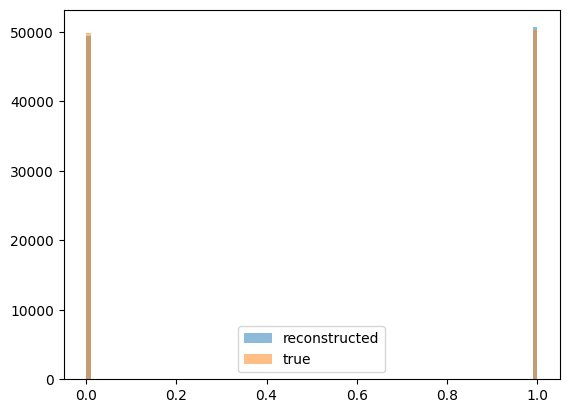

In [196]:
plt.hist(cls.predict(X_test_shap), bins=100, alpha=.5, label='reconstructed')
plt.hist(y_test_cut, bins=100, alpha=.5, label='true')
plt.legend()
plt.show()

In [237]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
BDT_predict = cls.predict(X_test_shap)
print(f'LGBM F1 score {f1_score(y_test_cut, BDT_predict)}')

LGBM F1 score 0.6817920393471233


In [231]:
NN_pred = numpy_predict(X_test_cut.values).squeeze()>0.5

In [232]:
print(f'MLP F1 score {f1_score(y_test_cut, NN_pred)}')

MLP F1 score 0.6834218104174421


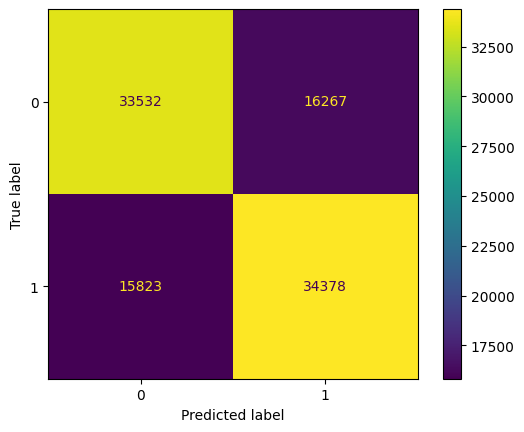

In [239]:
ConfusionMatrixDisplay.from_predictions(y_test_cut, BDT_predict)
plt.show()

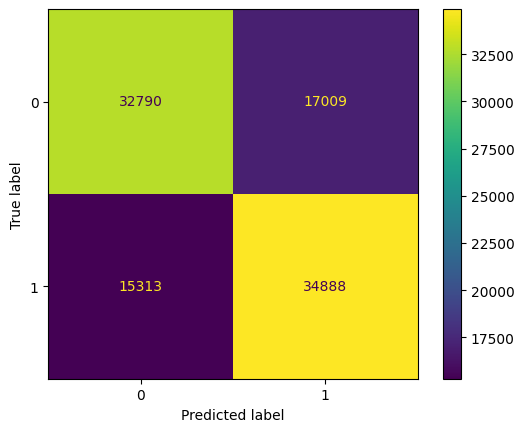

In [240]:
ConfusionMatrixDisplay.from_predictions(y_test_cut, NN_pred)
plt.show()